# CESED – CENTRO DE ENSINO SUPERIOR E DESENVOLVIMENTO  
# UNIFACISA – CENTRO UNIVERSITÁRIO

### Curso: Sistemas de Informação  
### Disciplina: 218606 - Elaborar Relatório Analítico de Data Science  
### Professor: Matheus Batista Silva

---

### Projeto: Análise da Qualidade do Ar no Estado de São Paulo (2015–2021)

#### Grupo:
- Carlos Renato Pereira da Silva  
- Thiago Emanuel Barros Fernandes  
- Jackson Souza Ramos  
- Sanclero de Melo Nunes  
- Wabstton Montenegro Bandeira
- Nivea Ester de Almeida Sousa

## Seção 1: Introdução

Este projeto, desenvolvido em grupo, tem como objetivo analisar dados sobre a qualidade do ar no estado de São Paulo, buscando entender como a poluição atmosférica tem evoluído nos últimos anos e quais impactos isso pode representar para a saúde da população.

O conjunto de dados utilizado contém informações coletadas entre **2015 e 2021** por **87 estações de monitoramento** distribuídas por diversas cidades do estado. Essas estações registram medições da concentração de **nove poluentes atmosféricos diferentes**, como MP10, O3, NO2, CO, entre outros. Além disso, o dataset inclui dados como a data e hora da medição, o local da estação, o tipo de coleta e a unidade de medição.

A partir dessa base, buscamos identificar padrões, comparar níveis de poluição entre regiões e acompanhar a variação desses indicadores ao longo do tempo.

Os dados foram obtidos da **Plataforma Qualidade do Ar**, mantida pelo **Instituto de Energia e Meio Ambiente (IEMA)**. Eles estão disponíveis publicamente no seguinte link:

### Legenda dos Poluentes

- **MP10** – Material Particulado com diâmetro até 10 µm  
- **MP2.5** – Material Particulado com diâmetro até 2,5 µm  
- **O3** – Ozônio  
- **NO2** – Dióxido de Nitrogênio  
- **NO** – Monóxido de Nitrogênio  
- **CO** – Monóxido de Carbono  
- **SO2** – Dióxido de Enxofre  
- **PTS** – Partículas Totais em Suspensão  
- **FMC** – Fumaça

Esses poluentes são monitorados por serem prejudiciais à saúde humana e ao meio ambiente, podendo agravar doenças respiratórias, cardiovasculares e contribuir com problemas de visibilidade e chuvas ácidas.

**Link dataset:** [https://www.kaggle.com/datasets/samirnunesdasilva/sao-paulo-pollution-data](https://www.kaggle.com/datasets/samirnunesdasilva/sao-paulo-pollution-data)

### 1.1  Cenário Proposto

Em parceria com o **Instituto de Energia e Meio Ambiente (IEMA)**, a **Prefeitura da Cidade de São Paulo** decidiu monitorar a qualidade do ar e os níveis de poluição na capital paulista. 
O principal objetivo dessa iniciativa é promover a melhoria da qualidade de vida e da saúde da população. 
Para isso, estão sendo analisados dados relacionados aos **poluentes atmosféricos**, como suas **concentrações medidas (valores)**, a **unidade de medida utilizada**, e os **locais específicos** onde as coletas foram realizadas.


## Seção 2: Importação das Bibliotecas

- **pandas**: manipulação e análise de dados em formato de tabelas (DataFrames).
- **numpy**: operações numéricas e suporte a arrays multidimensionais.
- **matplotlib.pyplot**: criação de visualizações e gráficos estáticos.
- **seaborn**: geração de gráficos estatísticos com visual mais atrativo e integração com pandas.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo padrão dos gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

## Seção 3: Leitura dos Dados

- **Definição do caminho**: especificamos o local onde o arquivo `.csv` está armazenado.
- **Leitura com `pandas`**: carregamos os dados do arquivo CSV para um DataFrame usando `pd.read_csv()`.
- **Dimensão do dataset**: exibimos a quantidade de linhas e colunas presentes no conjunto de dados utilizando `.shape`.


In [2]:
# Caminho do arquivo
caminho_arquivo = 'data/SP_poluicao_dados.csv'

# Leitura dos dados
df = pd.read_csv(caminho_arquivo)

# Exibe número de linhas e colunas
print(f'Dataset carregado com {df.shape[0]:,} linhas e {df.shape[1]} colunas.')

Dataset carregado com 10,980,515 linhas e 10 colunas.


## Seção 4: Visualização Inicial dos Dados

Nesta etapa, exibimos as 10 primeiras e as 10 últimas entradas do dataset utilizando os métodos `head(10)` e `tail(10)`, 
respectivamente. Essa abordagem permite verificar a estrutura inicial e final dos dados, ajudando a identificar possíveis 
inconsistências ou anomalias logo na leitura do arquivo.


In [3]:
# Primeiras 10 linhas
df.head(10)

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica
5,5,5,2015-01-01,06:00,Americana - Vila Santa Maria,SP01,MP10,24.0,ug/m3,automatica
6,6,6,2015-01-01,07:00,Americana - Vila Santa Maria,SP01,MP10,25.0,ug/m3,automatica
7,7,7,2015-01-01,08:00,Americana - Vila Santa Maria,SP01,MP10,41.0,ug/m3,automatica
8,8,8,2015-01-01,09:00,Americana - Vila Santa Maria,SP01,MP10,28.0,ug/m3,automatica
9,9,9,2015-01-01,10:00,Americana - Vila Santa Maria,SP01,MP10,19.0,ug/m3,automatica


In [4]:
# Últimas 10 linhas
df.tail(10)

,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
10980505,10980505,10980505,2021-02-01,01:00,Salto - Centro,SP56,SO2,3.0,ug/m3,manual
10980506,10980506,10980506,2021-05-01,01:00,Salto - Centro,SP56,SO2,3.0,ug/m3,manual
10980507,10980507,10980507,2021-09-01,01:00,Salto - Centro,SP56,SO2,7.0,ug/m3,manual
10980508,10980508,10980508,2021-10-01,01:00,Salto - Centro,SP56,SO2,5.0,ug/m3,manual
10980509,10980509,10980509,2021-01-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980510,10980510,10980510,2021-02-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980511,10980511,10980511,2021-03-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980512,10980512,10980512,2021-04-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980513,10980513,10980513,2021-05-01,01:00,Tatuapé,SP76,SO2,5.0,ug/m3,manual
10980514,10980514,10980514,2021-10-01,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual


### 4.1 Informações sobre tipos, nulos e estrutura geral

O comando `df.info()` é utilizado no pandas, uma biblioteca Python para análise de dados. Ele nos ajuda a **conhecer o dataset**, fornecendo informações sobre a **estrutura geral** dos dados. Com ele, podemos ver:

- O **número de linhas** e **colunas** no DataFrame.
- O tipo de dado de cada coluna.
- A quantidade de **valores não nulos** em cada coluna, o que nos ajuda a identificar dados faltantes.
- A **memória** utilizada pelo DataFrame.

Este comando é uma maneira rápida e eficiente de obter uma visão geral do seu dataset, permitindo entender quantas linhas e colunas existem, além dos tipos de dados presentes.


In [5]:
# Informações sobre tipos, nulos e estrutura geral
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980515 entries, 0 to 10980514
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   ID          int64  
 2   Data        object 
 3   Hora        object 
 4   Estacao     object 
 5   Codigo      object 
 6   Poluente    object 
 7   Valor       float64
 8   Unidade     object 
 9   Tipo        object 
dtypes: float64(1), int64(2), object(7)
memory usage: 837.7+ MB


## Seção 5: Limpesa dos Dados


### Verificação de Valores Nulos

Nesta etapa, verificamos a quantidade de valores ausentes (nulos) em cada coluna do dataset. Isso é importante para identificar problemas de qualidade nos dados que possam interferir nas análises. Os valores são apresentados em uma tabela com destaque em vermelho para facilitar a visualização das colunas mais afetadas.


In [6]:
# Calcula a quantidade de valores nulos por coluna
valores_nulos = df.isnull().sum().reset_index()
valores_nulos.columns = ['Coluna', 'Valores Nulos']

# Exibe como uma tabela formatada
valores_nulos.style.background_gradient(cmap='Reds').format(precision=0)


,Coluna,Valores Nulos
0,Unnamed: 0,0
1,ID,0
2,Data,0
3,Hora,0
4,Estacao,0
5,Codigo,0
6,Poluente,0
7,Valor,0
8,Unidade,0
9,Tipo,0


### 5.1 Conversão da Coluna de Datas

Nesta etapa, verificamos se a coluna `Data` está no formato apropriado (`datetime`). Caso não esteja, realizamos a conversão utilizando a função `pd.to_datetime()`, que interpreta automaticamente os valores e converte para o tipo `datetime64`.

Para preservar a integridade dos dados e manter a coluna `Data` pronta para análises (como ordenações ou filtragens por período), **mantemos o DataFrame original com o tipo `datetime`**.

 **Visualização:**  
Criamos uma cópia do DataFrame chamada `df_formatado`, onde a coluna `Data` é formatada no padrão brasileiro (`DD/MM/YYYY`). Essa versão é ideal para ser utilizada em relatórios e exibições mais amigáveis.

 **Observação:**  
Os valores originalmente estavam no formato `YYYY-MM-DD` (ex: `2015-01-02`). Após a conversão, continuam como tipo `datetime64` no DataFrame original, mas podem ser visualizados no formato `DD/MM/YYYY` na cópia formatada.



In [7]:
# Verificando o tipo da coluna 'Data' e convertendo, se necessário
if not pd.api.types.is_datetime64_any_dtype(df['Data']):
    df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
    print("Coluna 'Data' convertida para datetime.")
else:
    print("Coluna 'Data' já está no formato datetime.")

# Criando uma cópia do DataFrame para exibição com data formatada
df_formatado = df.copy()
df_formatado['Data'] = df_formatado['Data'].dt.strftime('%d/%m/%Y')

df_formatado.tail()

Coluna 'Data' convertida para datetime.


,Unnamed: 0,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
10980510,10980510,10980510,01/02/2021,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980511,10980511,10980511,01/03/2021,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980512,10980512,10980512,01/04/2021,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual
10980513,10980513,10980513,01/05/2021,01:00,Tatuapé,SP76,SO2,5.0,ug/m3,manual
10980514,10980514,10980514,01/10/2021,01:00,Tatuapé,SP76,SO2,3.0,ug/m3,manual


### 5.2 Verificação e Remoção de Duplicatas

Nesta etapa, analisamos se o conjunto de dados continha **linhas duplicadas**, ou seja, registros idênticos em todas as colunas. Esse tipo de duplicação pode ocorrer por erro de registro ou falha na consolidação das informações e pode impactar negativamente as análises estatísticas.

 **Procedimentos realizados:**
- Verificamos a presença de duplicatas utilizando `df.duplicated().sum()`.
- Caso houvesse, seriam removidas com `df.drop_duplicates()`.

 **Resultado:**  
A análise revelou que **não há linhas duplicadas** no conjunto de dados. Portanto, **nenhuma remoção foi necessária** nesta etapa.



In [8]:
#  Verificando duplicatas
duplicatas = df.duplicated().sum()
print(f'Total de linhas duplicadas: {duplicatas}')

#  Removendo duplicatas, se existirem
df = df.drop_duplicates()
print(f'Dataset após remoção de duplicatas: {df.shape[0]} linhas.')


Total de linhas duplicadas: 0
Dataset após remoção de duplicatas: 10980515 linhas.


### 5.3 Visualização dos Nomes das Colunas

Nesta etapa, visualizamos os nomes de todas as colunas do dataset para avaliarmos se há necessidade de renomeá-las, tornando-as mais descritivas, legíveis ou consistentes com boas práticas de nomenclatura em ciência de dados.

Após a inspeção, não houve necessidade de alteração dos nomes das colunas, pois todas já estão em português e são auto descritivas, o que facilita o entendimento e manipulação dos dados nas etapas seguintes da análise.

O comando utilizado foi:
```python
df.columns.tolist()

In [9]:
# Exibe os nomes de todas as colunas do DataFrame
print("Nome das colunas:")
print(df.columns.tolist())


Nome das colunas:
['Unnamed: 0', 'ID', 'Data', 'Hora', 'Estacao', 'Codigo', 'Poluente', 'Valor', 'Unidade', 'Tipo']


### 5.4 Remoção de Coluna Redundante

Durante a análise inicial das colunas, foi identificada a presença da coluna `Unnamed: 0`, que representa o índice do registro e contém os mesmos valores da coluna `ID`. Essa duplicidade torna a coluna redundante e, por isso, ela foi removida para manter o dataset mais limpo e organizado.

```python
df = df.drop(columns=['Unnamed: 0'])


In [10]:
# Remove espaços em branco dos nomes das colunas
df.columns = df.columns.str.strip()

# Verifica se há colunas com nome padrão gerado automaticamente (índice exportado)
colunas_sem_nome = [col for col in df.columns if 'Unnamed: 0' in col]

for coluna in colunas_sem_nome:
    df = df.drop(columns=[coluna])
    print(f"Coluna '{coluna}' removida por ser redundante.")
# df = df.drop(columns=['Unnamed: 0'])

Coluna 'Unnamed: 0' removida por ser redundante.


In [11]:
df.head()

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,0,2015-01-01,01:00,Americana - Vila Santa Maria,SP01,MP10,65.0,ug/m3,automatica
1,1,2015-01-01,02:00,Americana - Vila Santa Maria,SP01,MP10,98.0,ug/m3,automatica
2,2,2015-01-01,03:00,Americana - Vila Santa Maria,SP01,MP10,79.0,ug/m3,automatica
3,3,2015-01-01,04:00,Americana - Vila Santa Maria,SP01,MP10,53.0,ug/m3,automatica
4,4,2015-01-01,05:00,Americana - Vila Santa Maria,SP01,MP10,35.0,ug/m3,automatica


## Seção 6: Manipulação dos Dados

### 6.1 Criação de Amostras Aleatórias

Nesta etapa, foram geradas duas amostras aleatórias do dataset original, cada uma com **100 registros**.  
Essas amostras podem ser utilizadas em etapas posteriores de **modelagem preditiva**, como **treinamento** e **teste de modelos de machine learning**.

A separação aleatória ajuda a garantir que os dados estejam distribuídos de forma **representativa**, o que é essencial para obter **modelos mais robustos e generalizáveis**.


In [12]:
# Criação de duas amostras aleatórias com 100 registros cada
amostra1 = df.sample(n=100, random_state=42).reset_index(drop=True)
amostra2 = df.sample(n=100, random_state=7).reset_index(drop=True)


### Amostra 1 – Para Treinamento (exemplo)

In [13]:
amostra1.head()

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,2363283,2016-11-12,10:00,Piracicaba,SP51,NO2,7.0,ug/m3,automatica
1,6841388,2019-07-04,06:00,Guaratinguetá,SP04,MP10,34.0,ug/m3,automatica
2,5665143,2018-01-14,13:00,Osasco,SP42,MP10,12.0,ug/m3,automatica
3,3262888,2017-07-08,12:00,Cubatão - Centro,SP18,NO,4.0,ug/m3,automatica
4,7563299,2019-09-10,17:00,Ribeirão Preto,SP79,O3,93.0,ug/m3,automatica


### Amostra 2 – Para Teste (exemplo)

In [14]:
amostra2.head()

,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
0,5578601,2018-07-06,05:00,Marília,SP38,NO2,7.0,ug/m3,automatica
1,5668961,2018-06-24,21:00,Osasco,SP42,MP10,60.0,ug/m3,automatica
2,3108557,2017-01-20,23:55,Catanduva,SP13,NO,0.0,ug/m3,automatica
3,8586530,2020-01-26,11:00,Jaú,SP33,MP10,15.0,ug/m3,automatica
4,2759221,2016-08-02,08:00,Sorocaba,SP73,O3,5.0,ug/m3,automatica


### 6.2 Agrupamento por Estação

Nesta etapa, realizamos um agrupamento por **estação de monitoramento** (`Estacao`) com o objetivo de calcular a **média dos valores dos poluentes registrados** em cada uma. Esse tipo de análise permite identificar **quais localidades apresentam maior concentração média de poluentes**, o que pode ser útil para ações de monitoramento ambiental e saúde pública.

```python
# Agrupamento por estação para calcular a média dos valores dos poluentes
media_poluicao_estacao = df.groupby('Estacao')['Valor'].mean().sort_values(ascending=False)

# Exibe as médias em ordem decrescente
media_poluicao_estacao


In [15]:
# Agrupamento por estação para calcular a média dos valores dos poluentes
media_poluicao_estacao = df.groupby('Estacao')['Valor'].mean().sort_values(ascending=False)

# Exibe as médias em ordem decrescente
media_poluicao_estacao


Estacao
Santo André - Paço Municipal    436.696420
Campinas - Centro               411.976846
Taboão da Serra                 411.533445
Osasco                          242.848337
Santo Amaro                     235.991935
                                   ...    
Salto - Centro                   10.842105
Itu - Centro                      9.904321
Taubaté - Centro                  9.876404
Franca - Centro                   3.937500
Paulínia - João Aranha            3.413793
Name: Valor, Length: 87, dtype: float64

### 5.3 Filtro de Registros com Valor Acima da Média

Nesta etapa, aplicamos um filtro para selecionar os registros cuja concentração de poluentes (`Valor`) está **acima da média** do conjunto de dados. Os registros foram organizados em **ordem decrescente**, permitindo identificar os casos mais críticos de poluição.

Este tipo de análise é importante para destacar os pontos fora da curva, que podem representar eventos de poluição intensa ou falhas operacionais em estações de medição.

```python
# Calcula a média dos valores de poluentes
media_valor = df['Valor'].mean()

# Filtra os registros acima da média e ordena em ordem decrescente
acima_da_media = df[df['Valor'] > media_valor].sort_values(by='Valor', ascending=False)

# Exibe as 10 primeiras linhas filtradas
print(f'O valor médio de poluição é: {media_valor:.2f}')
acima_da_media.head(10)



In [16]:
# Calcula a média dos valores de poluentes
media_valor = df['Valor'].mean()

# Filtra os registros acima da média e ordena em ordem decrescente
acima_da_media = df[df['Valor'] > media_valor].sort_values(by='Valor', ascending=False)

# Exibe as 10 primeiras linhas filtradas
print(f'O valor médio de poluição é: {media_valor:.2f}')
acima_da_media



O valor médio de poluição é: 83.31


,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
1662796,1662796,2016-06-17,23:00,Congonhas,SP16,CO,9981.291759,ug/m3,automatica
2668753,2668753,2016-06-17,22:00,São Caetano do Sul,SP67,CO,9981.291759,ug/m3,automatica
341211,341211,2015-01-23,08:00,Cubatão - Centro,SP18,SO2,9645.000000,ug/m3,automatica
1662797,1662797,2016-06-17,23:55,Congonhas,SP16,CO,9606.993318,ug/m3,automatica
2426023,2426023,2016-06-17,21:00,Santo André - Paço Municipal,SP62,CO,9482.227171,ug/m3,automatica
...,...,...,...,...,...,...,...,...,...
4318836,4318836,2017-07-22,23:55,São Bernardo do Campo - Centro,SP65,O3,84.000000,ug/m3,automatica
4318838,4318838,2017-07-23,02:00,São Bernardo do Campo - Centro,SP65,O3,84.000000,ug/m3,automatica
4318619,4318619,2017-07-13,14:00,São Bernardo do Campo - Centro,SP65,O3,84.000000,ug/m3,automatica
4318962,4318962,2017-07-28,12:00,São Bernardo do Campo - Centro,SP65,O3,84.000000,ug/m3,automatica


### 5.4 Análise dos Valores Máximos e Mínimos de Poluição

Para compreender a amplitude da concentração de poluentes ao longo do tempo, foram identificados os registros com os **valores extremos** no dataset:

- **Valor máximo**: representa o maior nível registrado de poluição em um determinado momento e local.
- **Valor mínimo**: representa o menor nível registrado, podendo indicar boa qualidade do ar ou ausência do poluente no instante da medição.

O código abaixo mostra os registros correspondentes a esses valores:

```python
# Valor máximo de poluição
valor_max = df['Valor'].max()
registro_max = df[df['Valor'] == valor_max]

# Valor mínimo de poluição
valor_min = df['Valor'].min()
registro_min = df[df['Valor'] == valor_min]

print(f"Valor máximo de poluição: {valor_max}")
display(registro_max)

print(f"Valor mínimo de poluição: {valor_min}")
display(registro_min)


In [17]:
# Valor máximo de poluição
valor_max = df['Valor'].max()
registro_max = df[df['Valor'] == valor_max]

# Valor mínimo de poluição
valor_min = df['Valor'].min()
registro_min = df[df['Valor'] == valor_min]

print(f"Valor máximo de poluição: {valor_max}")
display(registro_max)

print(f"Valor mínimo de poluição: {valor_min}")
display(registro_min)

Valor máximo de poluição: 9981.291759


,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
1662796,1662796,2016-06-17,23:00,Congonhas,SP16,CO,9981.291759,ug/m3,automatica
2668753,2668753,2016-06-17,22:00,São Caetano do Sul,SP67,CO,9981.291759,ug/m3,automatica


Valor mínimo de poluição: 0.0


,ID,Data,Hora,Estacao,Codigo,Poluente,Valor,Unidade,Tipo
43,43,2015-01-02,20:00,Americana - Vila Santa Maria,SP01,MP10,0.0,ug/m3,automatica
162,162,2015-01-07,19:00,Americana - Vila Santa Maria,SP01,MP10,0.0,ug/m3,automatica
271,271,2015-01-12,08:00,Americana - Vila Santa Maria,SP01,MP10,0.0,ug/m3,automatica
427,427,2015-01-18,20:00,Americana - Vila Santa Maria,SP01,MP10,0.0,ug/m3,automatica
2302,2302,2015-06-25,07:00,Americana - Vila Santa Maria,SP01,MP10,0.0,ug/m3,automatica
...,...,...,...,...,...,...,...,...,...
10976207,10976207,2021-08-02,08:00,Taubaté,SP78,O3,0.0,ug/m3,automatica
10976364,10976364,2021-08-09,03:00,Taubaté,SP78,O3,0.0,ug/m3,automatica
10976365,10976365,2021-08-09,04:00,Taubaté,SP78,O3,0.0,ug/m3,automatica
10976367,10976367,2021-08-09,07:00,Taubaté,SP78,O3,0.0,ug/m3,automatica


### Pergunta 1: Qual é a estação com maior média de poluição (Valor)?

#### Justificativa:

Identificar a estação com a maior média de poluição é essencial para reconhecer as áreas mais críticas em relação à qualidade do ar. Essa informação pode orientar políticas públicas, intervenções ambientais e alocação de recursos para mitigar os efeitos da poluição nas regiões mais afetadas.

#### Resultado:

A média de poluição por estação foi calculada com base nos dados coletados. Após ordenar os resultados do maior para o menor valor médio de poluição, identificou-se a estação com maior impacto.

#### Interpretação:

A estação **Santo André - Paço Municipal** apresentou a maior média de poluição entre todas as estações analisadas, com **436,70 µg/m³**. Esse valor está significativamente acima das demais médias, indicando uma situação crítica que merece atenção.

#### Conclusão:

A análise revelou que a estação com maior média de poluição é **Santo André - Paço Municipal**, com uma média de **436,70 µg/m³**. Este resultado destaca a necessidade de medidas urgentes nessa região para melhorar a qualidade do ar e proteger a saúde da população.

In [18]:
# Agrupar os dados por estação e calcular a média da coluna 'Valor'
media_por_estacao = df.groupby('Estacao')['Valor'].mean()

# Ordenar da maior para a menor média
media_por_estacao_ordenado = media_por_estacao.sort_values(ascending=False)

# Exibir os resultados
print("Média de poluição por estação (µg/m³):")
print(media_por_estacao_ordenado)
print(f"\nEstação com maior média de poluição: {media_por_estacao_ordenado.idxmax()} ({media_por_estacao_ordenado.max():.2f} µg/m³)")


Média de poluição por estação (µg/m³):
Estacao
Santo André - Paço Municipal    436.696420
Campinas - Centro               411.976846
Taboão da Serra                 411.533445
Osasco                          242.848337
Santo Amaro                     235.991935
                                   ...    
Salto - Centro                   10.842105
Itu - Centro                      9.904321
Taubaté - Centro                  9.876404
Franca - Centro                   3.937500
Paulínia - João Aranha            3.413793
Name: Valor, Length: 87, dtype: float64

Estação com maior média de poluição: Santo André - Paço Municipal (436.70 µg/m³)


##  Pergunta 2: Em quais horários do dia os níveis de poluição são mais altos?

### Justificativa:
Essa análise ajuda a identificar **padrões de comportamento humano** que impactam a poluição, como **trânsito intenso**, **atividades industriais** ou **condições atmosféricas específicas**. Isso é essencial para **ações de prevenção e políticas públicas ambientais**.

### Análise dos Resultados:

Com base no gráfico e nos dados abaixo, os horários com **maior média de poluição** são:

- **20:00** → 97.43 µg/m³  
- **19:00** → 96.67 µg/m³  
- **01:00** → 96.28 µg/m³  
- **21:00** → 96.10 µg/m³  
- **22:00** → 95.67 µg/m³  

Estes picos indicam que os níveis de poluição tendem a ser mais altos no **início da noite** e em certos momentos da madrugada. Isso pode estar relacionado ao tráfego de retorno para casa, funcionamento de indústrias ou menor dispersão de poluentes devido às condições atmosféricas noturnas.

Já os **menores valores** ocorrem por volta de **05:00**, sugerindo que esse horário apresenta **menor atividade humana e melhor dispersão atmosférica**.

Essa informação pode orientar campanhas de conscientização e estratégias de mitigação da exposição à poluição.


## Explicação do Código

O código apresentado tem como objetivo **identificar os horários do dia em que os níveis médios de poluição são mais altos**. Para isso, ele executa as seguintes etapas:

1. **Agrupamento por horário (`Hora`)**: Utiliza o método `groupby()` para agrupar os dados por hora do dia.
2. **Cálculo da média**: Com o método `mean()`, calcula-se a média dos valores de poluição para cada horário.
3. **Ordenação decrescente**: Usa `sort_values(ascending=False)` para identificar os horários com maiores níveis médios de poluição.
4. **Visualização com gráfico**: Utiliza o `seaborn` e `matplotlib` para plotar a média de poluição por horário em um gráfico de linha.

Essa abordagem permite analisar de forma clara **em quais momentos do dia ocorrem os picos de poluição**, algo essencial para estudos ambientais e decisões políticas.


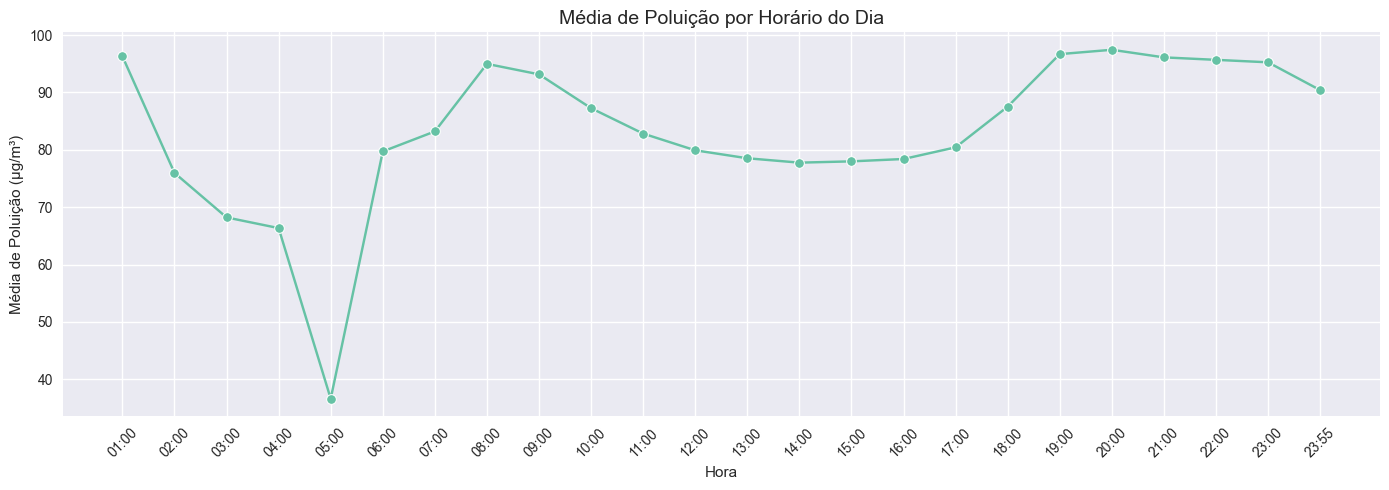

In [19]:
# Converter a coluna 'Hora' para o tipo datetime com hora e minuto
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M', errors='coerce')

# Remover possíveis valores nulos após conversão
df = df.dropna(subset=['Hora'])

# Agrupar por hora e calcular a média da poluição
media_por_hora = df.groupby(df['Hora'].dt.strftime('%H:%M'))['Valor'].mean()

# Ordenar por hora
media_por_hora = media_por_hora.sort_index()

# Gráfico de linha corrigido
plt.figure(figsize=(14, 5))
sns.lineplot(x=media_por_hora.index, y=media_por_hora.values, marker='o')
plt.xticks(rotation=45)
plt.title("Média de Poluição por Horário do Dia", fontsize=14)
plt.xlabel("Hora")
plt.ylabel("Média de Poluição (µg/m³)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Explicação do Código

O objetivo do código foi **analisar quais poluentes apresentam os maiores níveis médios** no dataset. O processo incluiu os seguintes passos:

1. **Agrupamento por tipo de poluente (`Poluente`)**: Agrupou-se os dados com `groupby()` para analisar separadamente cada substância.
2. **Cálculo da média por poluente**: Com `mean()`, foi obtida a média dos valores de concentração para cada tipo de poluente.
3. **Ordenação decrescente**: Com `sort_values(ascending=False)`, os poluentes foram ordenados do mais poluente ao menos poluente.
4. **Visualização gráfica**: Foi gerado um gráfico de barras com `seaborn` para facilitar a comparação visual.

Essa análise permite compreender **quais substâncias têm maior presença no ar monitorado** — fundamental para orientar políticas públicas de controle ambiental e alertar a população sobre os riscos mais comuns.


## Pergunta 3: Quais poluentes apresentam os maiores níveis médios?

### Justificativa:
Identificar os poluentes com maiores concentrações médias é essencial para compreender os principais contaminantes presentes no ar, possibilitando estratégias de controle ambiental, prevenção de doenças respiratórias e direcionamento de políticas públicas de saúde.

### Interpretação:
O gráfico a seguir mostra a **média da concentração (µg/m³)** de cada poluente presente no dataset:

- **CO (Monóxido de Carbono)** apresenta disparadamente a maior média de concentração, indicando uma forte emissão desse gás, possivelmente devido ao tráfego de veículos e queima de combustíveis fósseis.
- **PTS (Partículas Totais em Suspensão)** e **O₃ (Ozônio)** também aparecem com médias significativas, o que reforça sua presença no ambiente urbano.
- Poluentes como **MP10, NO2, MP2.5 e SO2** apresentam médias menores, mas ainda assim relevantes no contexto da qualidade do ar.

Esses resultados são importantes para definir quais poluentes devem ser priorizados nas ações de monitoramento e controle ambiental.


Poluente
CO       712.781792
PTS       72.616374
O3        39.877003
MP10      29.207835
NO2       25.675854
FMC       16.407719
MP2.5     15.756391
NO        15.103614
SO2        4.443398
Name: Valor, dtype: float64


C:\Users\Jackson\AppData\Local\Temp\ipykernel_9204\2517993983.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_poluentes.values, y=media_poluentes.index, palette='crest')


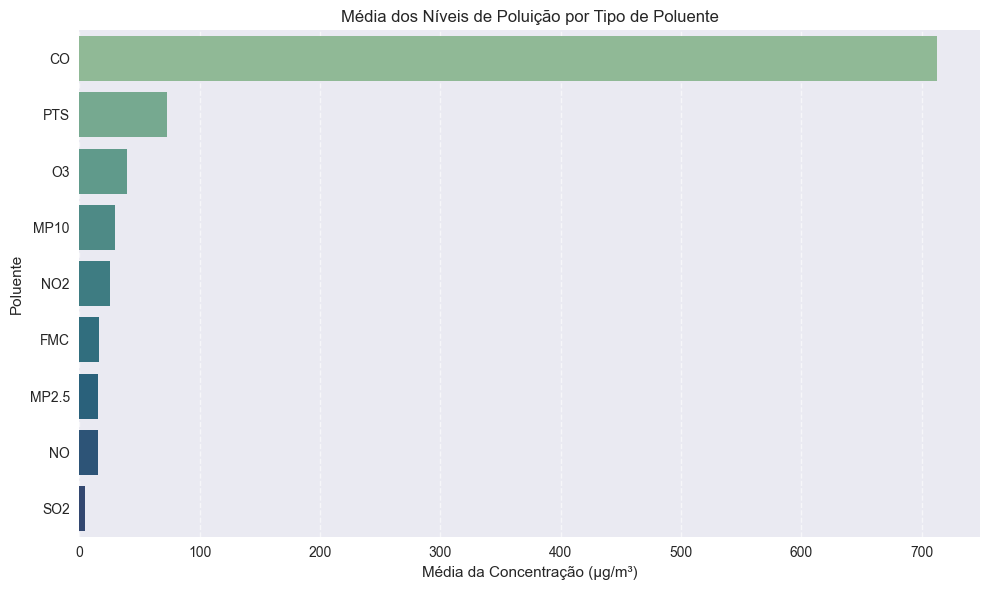

In [20]:
# Agrupa os dados por tipo de poluente e calcula a média dos valores
media_poluentes = df.groupby('Poluente')['Valor'].mean().sort_values(ascending=False)

# Exibe os valores calculados
print(media_poluentes)

# Visualização com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=media_poluentes.values, y=media_poluentes.index, palette='crest')
plt.title('Média dos Níveis de Poluição por Tipo de Poluente')
plt.xlabel('Média da Concentração (µg/m³)')
plt.ylabel('Poluente')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Pergunta 4: A poluição está aumentando ou diminuindo ao longo dos anos?

#### Justificativa:
Entender a evolução dos níveis de poluição ao longo dos anos é crucial para avaliar o impacto de ações governamentais, leis ambientais, eventos climáticos e econômicos. Essa análise ajuda a verificar se os níveis de poluição estão sob controle ou se há necessidade de ações corretivas.

#### Interpretação:
- Em **2015**, os níveis de poluição estavam bastante altos.  
- De **2015 a 2017**, observamos uma **redução significativa**.  
- **2018** teve um **leve aumento**, mas não retornou aos níveis anteriores.  
- A **tendência de queda** continua de **2019 a 2021**, com os menores níveis registrados em **2021**.

#### Conclusão:
A análise mostra uma **tendência geral de diminuição** nos níveis médios de poluição ao longo dos anos, o que sugere possíveis efeitos positivos de **políticas ambientais** ou impactos de eventos como a **pandemia**.


    Ano       Valor
0  2015  116.347594
1  2016   95.497755
2  2017   70.767833
3  2018   84.772056
4  2019   81.460810
5  2020   73.259215
6  2021   67.092175


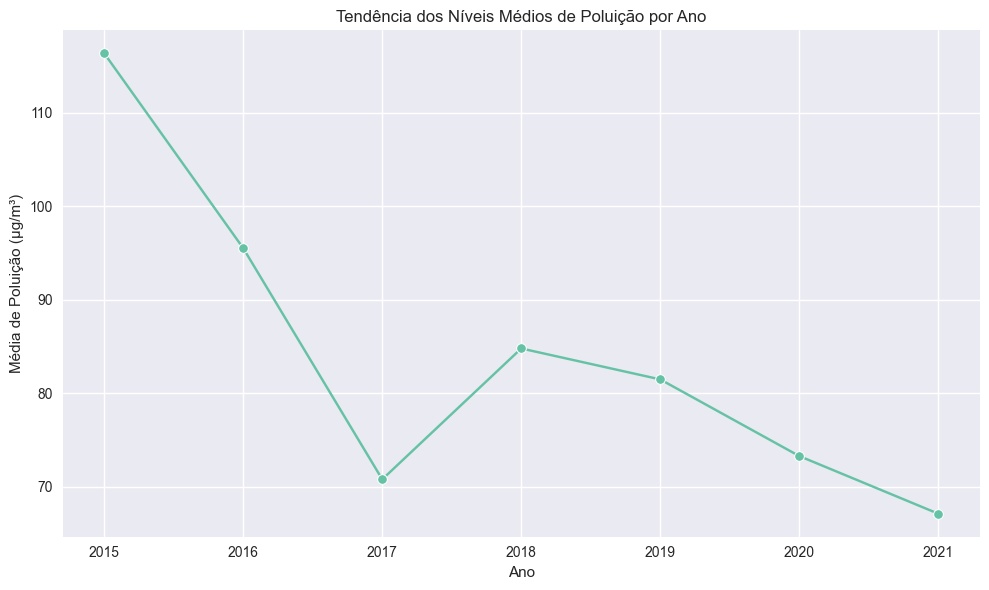

In [21]:
# Cria uma nova coluna com o ano
df['Ano'] = df['Data'].dt.year

# Agrupa pela coluna 'Ano' e calcula a média dos valores de poluição
media_por_ano = df.groupby('Ano')['Valor'].mean().reset_index()

# Visualiza os dados
print(media_por_ano)

# Gera o gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=media_por_ano, x='Ano', y='Valor', marker='o')
plt.title('Tendência dos Níveis Médios de Poluição por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Poluição (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Pergunta 5: Existe diferença nos níveis de poluição entre os dias da semana?

 **Justificativa:**  
Analisar a média dos níveis de poluição por dia da semana ajuda a identificar padrões relacionados à rotina da sociedade. Dias úteis geralmente apresentam maior atividade industrial e tráfego, enquanto os fins de semana tendem a ter menor movimentação. Essa informação pode orientar medidas específicas de controle e planejamento urbano.

 **Resultado:**  

 **Interpretação:**  
- Os níveis de poluição são mais altos nas **sextas-feiras**, seguidos de perto pelos outros dias úteis.  
- O **domingo** apresenta os menores níveis médios de poluição, possivelmente devido à redução no tráfego e atividades industriais.  
- O **sábado** mostra uma leve queda em relação aos dias úteis, mas ainda mais alto que o domingo.  
- O padrão confirma que a **atividade humana nos dias úteis** contribui diretamente para o aumento da poluição.

 **Conclusão:**  
Sim, existe diferença nos níveis de poluição entre os dias da semana. Os dias úteis apresentam níveis mais elevados, enquanto os fins de semana, especialmente o domingo, mostram redução significativa. Esses dados reforçam a relação direta entre atividade humana e a emissão de poluentes atmosféricos.

C:\Users\Jackson\AppData\Local\Temp\ipykernel_9204\3352546921.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_por_dia.index, y=media_por_dia.values, palette='crest')


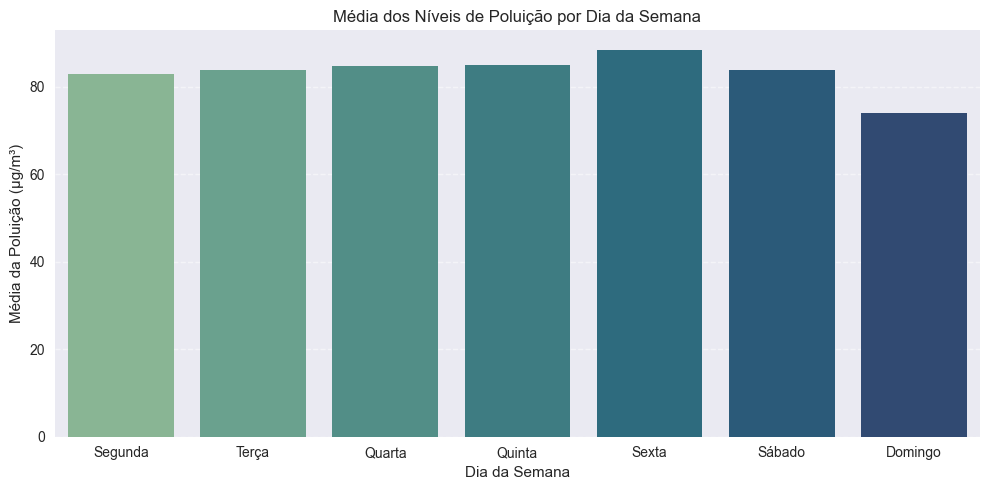

In [22]:
# Extrair o dia da semana (0 = segunda-feira, 6 = domingo)
df['Dia_Semana'] = df['Data'].dt.dayofweek

# Mapeando os números para nomes dos dias
dias_semana = {
    0: 'Segunda',
    1: 'Terça',
    2: 'Quarta',
    3: 'Quinta',
    4: 'Sexta',
    5: 'Sábado',
    6: 'Domingo'
}
df['Dia_Semana'] = df['Dia_Semana'].map(dias_semana)

# Calcular a média da poluição por dia da semana
media_por_dia = df.groupby('Dia_Semana')['Valor'].mean().reindex([
    'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'
])

# Plotar
plt.figure(figsize=(10, 5))
sns.barplot(x=media_por_dia.index, y=media_por_dia.values, palette='crest')
plt.title('Média dos Níveis de Poluição por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média da Poluição (µg/m³)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Pergunta 6: Quantos registros estão acima da média de poluição e quais são os maiores?

#### Justificativa:

Investigar os registros acima da média auxilia na identificação de anomalias, além de destacar os períodos mais críticos de poluição. Essa análise permite ações direcionadas de fiscalização e alerta, sobretudo em momentos de risco à saúde pública.

#### Resultado:

* **Média geral dos níveis de poluição:** aproximadamente **82.94 µg/m³**
* **Total de registros acima da média:** **2.296**

#### Interpretação:

Os 10 maiores registros de poluição estão significativamente acima da média. Esses picos extremos são momentos críticos que merecem atenção especial. São eles:

| Data       | Hora  | Estação        | Poluente | Valor (µg/m³) |
| ---------- | ----- | -------------- | -------- | ------------- |
| 2021-10-01 | 00:00 | UNIFESP        | MP10     | 381.0         |
| 2017-09-09 | 00:00 | CERQUERA CESAR | MP10     | 370.0         |
| 2021-10-08 | 00:00 | UNIFESP        | MP10     | 351.0         |
| 2021-10-04 | 00:00 | UNIFESP        | MP10     | 336.0         |
| 2021-10-11 | 00:00 | UNIFESP        | MP10     | 335.0         |
| 2021-10-07 | 00:00 | UNIFESP        | MP10     | 332.0         |
| 2021-10-06 | 00:00 | UNIFESP        | MP10     | 331.0         |
| 2021-10-05 | 00:00 | UNIFESP        | MP10     | 329.0         |
| 2021-10-12 | 00:00 | UNIFESP        | MP10     | 328.0         |
| 2021-10-09 | 00:00 | UNIFESP        | MP10     | 325.0         |

#### Conclusão:

A maioria dos maiores registros de poluição está concentrada na estação **UNIFESP**, principalmente em outubro de 2021, indicando um evento ou período crítico. O monitoramento e investigação de causas específicas nesses momentos são fundamentais para mitigar impactos à saúde pública e ao meio ambiente.

In [23]:
# Calcular a média da coluna 'Valor'
media_poluicao = df['Valor'].mean()

# Filtrar registros acima da média
acima_da_media = df[df['Valor'] > media_poluicao]

# Ordenar os registros do maior para o menor
acima_da_media_ordenado = acima_da_media.sort_values(by='Valor', ascending=False)

# Mostrar resultados
print(f'Total de registros acima da média: {len(acima_da_media)}')
print('\nRegistros com maiores níveis de poluição:')
print(acima_da_media_ordenado.head(10))

Total de registros acima da média: 1313463

Registros com maiores níveis de poluição:
              ID       Data                Hora                       Estacao  \
1662796  1662796 2016-06-17 1900-01-01 23:00:00                     Congonhas   
2668753  2668753 2016-06-17 1900-01-01 22:00:00            São Caetano do Sul   
341211    341211 2015-01-23 1900-01-01 08:00:00              Cubatão - Centro   
1662797  1662797 2016-06-17 1900-01-01 23:55:00                     Congonhas   
2426023  2426023 2016-06-17 1900-01-01 21:00:00  Santo André - Paço Municipal   
2426025  2426025 2016-06-17 1900-01-01 23:00:00  Santo André - Paço Municipal   
4270348  4270348 2017-08-08 1900-01-01 23:00:00  Santo André - Paço Municipal   
1229639  1229639 2015-09-01 1900-01-01 07:00:00            São Caetano do Sul   
4270346  4270346 2017-08-08 1900-01-01 21:00:00  Santo André - Paço Municipal   
2426022  2426022 2016-06-17 1900-01-01 20:00:00  Santo André - Paço Municipal   

        Codigo Poluent

#                                                            FASE 2

## Análise por Tipos de Dados — Métodos de Estatística Descritiva

Nesta seção, utilizamos métodos de estatística descritiva para identificar e classificar os tipos de variáveis presentes no conjunto de dados analisado. Essa distinção é essencial para aplicar técnicas estatísticas apropriadas, além de facilitar a compreensão da natureza das informações.

Abaixo, categorizamos as variáveis do DataFrame em qualitativas nominais, qualitativas ordinais, quantitativas discretas e quantitativas contínuas, com base nas suas características e comportamento:

### Tipos de Dados Presentes no DataFrame

| Tipo de Dado                  | Coluna                  | Justificativa                                                                 |
|------------------------------|--------------------------|------------------------------------------------------------------------------|
| **Qualitativo Nominal**      | `Estacao`, `Poluente`    | Representam nomes de locais ou substâncias. Não possuem ordem entre os valores. |
| **Qualitativo Ordinal**      | `Tipo`                   | Aparentemente indica o tipo de medição (ex: automática ou manual); se houvesse classificação da qualidade do ar (ex: "boa", "moderada", "ruim"), seria ordinal. |
| **Quantitativo Discreto**    | `ID`, `Codigo`           | São números inteiros sem frações, utilizados como identificadores.          |
| **Quantitativo Contínuo**    | `Valor`                  | Representa medições contínuas de poluentes (em µg/m³), podendo assumir valores decimais. |


###  Medidas de Tendência Central – Coluna `Valor`

As medidas de tendência central são utilizadas para resumir um conjunto de dados com um único valor representativo. Abaixo estão os resultados obtidos para a coluna `Valor`:

- **Média**: 83.31  
  É a média aritmética dos valores. Representa o valor "central" esperado, considerando todos os dados. No contexto da poluição, indica a concentração média registrada de um determinado poluente.

- **Mediana**: 22.0  
  Valor que separa a metade inferior da metade superior dos dados. Como a mediana está bem abaixo da média, isso sugere uma distribuição assimétrica (possivelmente com valores extremos para cima).

- **Moda**: 1.0  
  Valor que mais se repete no conjunto de dados. No caso da coluna `Valor`, o valor mais frequente foi 1.0, o que pode indicar muitos registros com concentrações muito baixas ou próximas de zero.


In [24]:
# Seleciona apenas a coluna 'Valor'
coluna_valor = df['Valor']

# Calcula as medidas de tendência central
media = round(coluna_valor.mean(), 2)  
mediana = coluna_valor.median()
moda = coluna_valor.mode().iloc[0]     

tendencia_central_valor = pd.DataFrame({
    'Medida': ['Média', 'Mediana', 'Moda'],
    'Valor': [media, mediana, moda]
})

print("Medidas de Tendência Central para a coluna 'Valor':")
display(tendencia_central_valor)


Medidas de Tendência Central para a coluna 'Valor':


,Medida,Valor
0,Média,83.31
1,Mediana,22.00
2,Moda,1.00


###  Medidas de Dispersão – Coluna `Valor`

As medidas de dispersão ajudam a entender a variabilidade dos dados em relação à média. Abaixo estão os resultados extraídos para a coluna `Valor`:

- **Amplitude**: 9981.29  
  Representa a diferença entre o maior e o menor valor da variável. Nesse caso, os valores de concentração variam quase 10.000 unidades, o que indica um grande intervalo de variação.

- **Desvio Padrão**: 250.01  
  Mede o quanto, em média, os dados se afastam da média. Um desvio padrão alto sugere que os valores estão bem dispersos em torno da média.

- **Variância**: 62503.54  
  É o quadrado do desvio padrão. Indica a variabilidade dos dados, mas por estar em unidades elevadas (ug/m³)², nem sempre é tão intuitiva.

- **Coeficiente de Variação (CV)**: 300.10%  
  É uma medida relativa que relaciona o desvio padrão com a média. Um CV acima de 100% mostra que a dispersão é muito alta em relação à média — neste caso, os dados são altamente variáveis.


In [25]:
# Seleciona a coluna 'Valor'
coluna_valor = df['Valor']

# Calcula as medidas de dispersão
amplitude = coluna_valor.max() - coluna_valor.min()
desvio_padrao = coluna_valor.std()
variancia = coluna_valor.var()
media = coluna_valor.mean()
coef_var = (desvio_padrao / media) * 100

# Exibe os resultados em formato organizado
medidas_dispersao_valor = pd.DataFrame({
    'Medida': ['Amplitude', 'Desvio Padrão', 'Variância', 'Coef. de Variação (%)'],
    'Valor': [amplitude, desvio_padrao, variancia, coef_var]
})

print("Medidas de Dispersão para a coluna 'Valor':")
display(medidas_dispersao_valor)


Medidas de Dispersão para a coluna 'Valor':


,Medida,Valor
0,Amplitude,9981.291759
1,Desvio Padrão,250.007089
2,Variância,62503.544432
3,Coef. de Variação (%),300.097008


### Análise dos Valores de Poluentes

#### Pergunta  
Dado que a média dos valores registrados é **83,31**, mas a mediana é **22,00** e a moda é **1,0**, com um desvio padrão de aproximadamente **250,01** e um coeficiente de variação de **300%**, o que isso indica sobre a distribuição dos valores de poluentes registrados?

#### Conclusão  
Os valores de poluentes apresentam uma **distribuição assimétrica à direita**, com uma **forte dispersão** dos dados em relação à média. A grande diferença entre média (83,31), mediana (22,00) e moda (1,0) mostra que há muitos valores baixos e alguns valores extremamente altos que puxam a média para cima.

Além disso, o **coeficiente de variação de 300%** indica uma **altíssima variabilidade relativa**, o que significa que os dados estão altamente espalhados em torno da média. A **amplitude de quase 10.000** reforça a ideia de que existem valores atípicos muito altos.

Essas características sugerem que o nível de poluentes sofre **variações extremas ao longo do tempo**, o que pode estar associado a fatores ambientais, horários de pico de tráfego ou diferentes regiões monitoradas. É necessário ter cuidado ao interpretar a média nesse caso, pois ela **não representa adequadamente a maioria dos valores observados**.


### Análise de Outliers com Intervalo Interquartil (IQR)

Nesta análise, utilizamos o método do **Intervalo Interquartil (IQR)** para identificar outliers na coluna **`Valor`**.

#### Estatísticas Calculadas:
- **Q1 (1º Quartil):** 9.0  
- **Q3 (3º Quartil):** 45.0  
- **IQR (Q3 - Q1):** 36.0  
- **Limite Inferior:** -45.0  
- **Limite Superior:** 99.0

Valores inferiores a -45.0 ou superiores a 99.0 são considerados outliers. Como todos os valores da base são maiores que -45.0, apenas os valores **acima de 99.0** foram identificados como outliers.

#### Total de Outliers Detectados:
**1.113.840** valores excederam o limite superior de 99.0.

#### Exemplos de Outliers:
- 106.0 (índice 285)  
- 107.0 (índice 468)  
- 108.0 (índice 482)  
- 143.0 (índice 1694)  
- 153.0 (índice 1979)  

#### Conclusão:
A quantidade significativa de outliers identificados acima do valor 99.0 demonstra que a distribuição dos dados é **assimétrica e enviesada positivamente**, com muitos valores concentrados em uma cauda longa à direita. Esse padrão pode indicar:
- Presença de registros extremos (ex. valores monetários muito altos)
- Possível necessidade de tratamento (remoção ou transformação dos dados)
- Potencial distorção na média e em outras medidas estatísticas

Recomenda-se avaliar o impacto desses outliers nos resultados antes de prosseguir com análises mais aprofundadas.


In [26]:
# Seleciona a coluna numérica
coluna_valor = df['Valor']

# Calcula os quartis
q1 = coluna_valor.quantile(0.25)
q3 = coluna_valor.quantile(0.75)
iqr = q3 - q1

# Define os limites para outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Filtra os possíveis outliers
outliers = coluna_valor[(coluna_valor < limite_inferior) | (coluna_valor > limite_superior)]
sem_outliers = coluna_valor[(coluna_valor >= limite_inferior) & (coluna_valor <= limite_superior)]

# Exibe os resultados
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")
print(f"Número de Outliers Detectados: {outliers.count()}")

# Visualização opcional dos valores extremos
display(outliers)


Q1: 9.0
Q3: 45.0
IQR: 36.0
Limite Inferior: -45.0
Limite Superior: 99.0
Número de Outliers Detectados: 1113840


285         106.0
468         107.0
482         108.0
1585        104.0
1694        143.0
            ...  
10980180    133.0
10980181    147.0
10980182    103.0
10980267    119.0
10980401    126.0
Name: Valor, Length: 1113840, dtype: float64

## **Qual é a proporção dos tipos de poluentes medidos ao longo do tempo?**

### Explicação

O gráfico de pizza representa a **distribuição percentual dos diferentes tipos de poluentes** medidos ao longo do tempo. Cada fatia do gráfico mostra a proporção de registros associados a um determinado poluente com base na frequência de ocorrência na base de dados. Esse tipo de visualização é útil para identificar quais poluentes são mais monitorados e, possivelmente, mais prevalentes nas áreas estudadas.

---

### Insight

A análise mostra que os poluentes **MP10** (26,3%) e **O₃ (ozônio)** (24,1%) dominam a distribuição, respondendo juntos por mais de **50% de todas as medições**. Isso indica que:

- **MP10** é um dos principais componentes particulados do ar e sua alta frequência de medição reflete a preocupação com seus impactos na saúde, especialmente doenças respiratórias.
- **Ozônio (O₃)** também recebe atenção significativa, sendo associado a poluição fotoquímica e agravamento de problemas pulmonares.

Esse padrão sugere que esses dois poluentes representam os **principais desafios ambientais** enfrentados nas regiões monitoradas e merecem atenção especial em políticas públicas de controle da qualidade do ar.


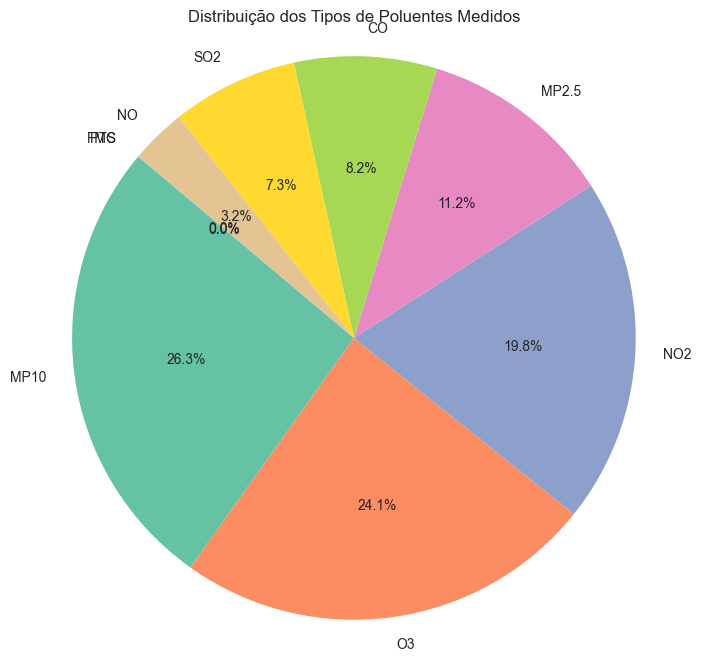

In [27]:
# Contar a frequência de cada poluente
poluente_counts = df['Poluente'].value_counts()

# Criar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(poluente_counts, labels=poluente_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição dos Tipos de Poluentes Medidos')
plt.axis('equal')  # Deixa o gráfico redondo
plt.show()

## **Pergunta:** Existem outliers nos valores de concentração de MP10?

Sim, existem **outliers significativos** nos valores de concentração do poluente MP10.

#### Explicação:

O boxplot apresenta os seguintes parâmetros estatísticos:

* **Q1 (1º quartil):** 13.0
* **Q3 (3º quartil):** 37.0
* **IQR (Intervalo Interquartil):** 24.0
* **Limite Inferior:** -23.0
* **Limite Superior:** 73.0
* **Outliers detectados:** 157.540 valores

Com base no cálculo do IQR, qualquer valor de concentração acima de **73.0 µg/m³** é considerado outlier. Como a distribuição dos dados é assimétrica à direita (com muitos pontos extremos para cima), o gráfico mostra uma grande quantidade de círculos acima da caixa, representando esses valores extremos.

#### Insight:

A presença de **mais de 157 mil outliers** indica que existem episódios de concentração de MP10 muito acima do esperado, o que pode estar relacionado a eventos pontuais de poluição intensa, falhas de medição, ou características locais da estação. Esses valores extremos podem distorcer análises estatísticas tradicionais e devem ser analisados separadamente para entender suas causas.

Q1: 13.0
Q3: 37.0
IQR: 24.0
Limite Inferior: -23.0
Limite Superior: 73.0
Número de Outliers Detectados: 157540


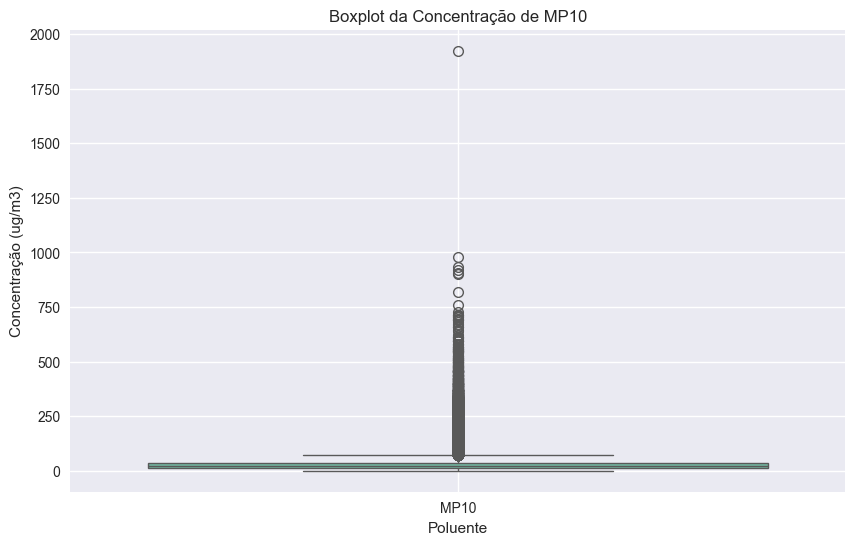

In [28]:
# Filtrar apenas os registros de MP10
df_mp10 = df[df['Poluente'] == 'MP10']

# Calcular Q1, Q3 e IQR
q1 = df_mp10['Valor'].quantile(0.25)
q3 = df_mp10['Valor'].quantile(0.75)
iqr = q3 - q1

# Definir limites para outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Detectar outliers
outliers = df_mp10[(df_mp10['Valor'] < limite_inferior) | (df_mp10['Valor'] > limite_superior)]

# Mostrar quantidade de outliers
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Limite Inferior: {limite_inferior}")
print(f"Limite Superior: {limite_superior}")
print(f"Número de Outliers Detectados: {len(outliers)}")

# Plotar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mp10, x='Poluente', y='Valor')
plt.title('Boxplot da Concentração de MP10')
plt.ylabel('Concentração (ug/m3)')
plt.xlabel('Poluente')
plt.grid(True)
plt.show()

###  Histograma – Distribuição da Concentração de MP10


#### **Explicação**

O histograma acima representa a distribuição das concentrações do poluente MP10 (material particulado inalável com diâmetro até 10 μm). As barras mostram com que frequência diferentes faixas de concentração aparecem no conjunto de dados.

É possível observar que a maior parte das medições está concentrada nas faixas mais baixas de concentração, principalmente abaixo de **50 µg/m³**, com frequência decrescendo rapidamente conforme o valor aumenta. Há uma cauda longa à direita (distribuição assimétrica), o que indica a presença de **valores extremos (outliers)** com concentrações significativamente elevadas.

#### **Insight**

A distribuição de MP10 é fortemente assimétrica à direita, o que sugere que, embora a maioria dos registros indique concentrações moderadas ou baixas, **ocorrem picos de poluição que podem representar eventos críticos para a saúde pública e o meio ambiente**. Isso reforça a importância do monitoramento contínuo, especialmente em regiões propensas a essas elevações esporádicas, para que medidas preventivas possam ser tomadas em tempo hábil.

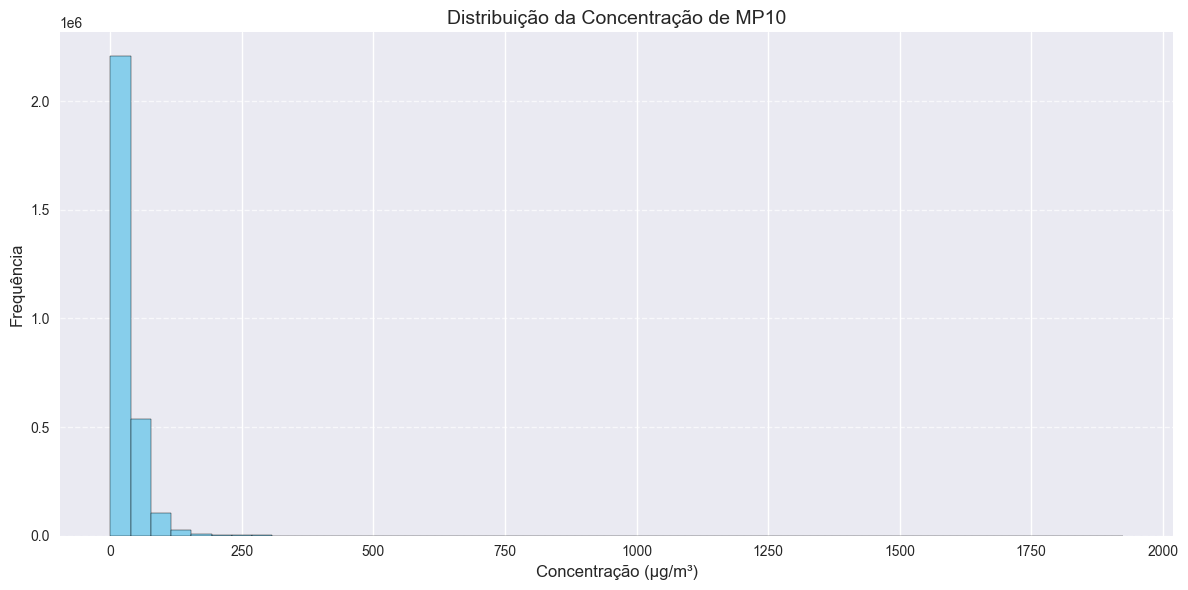

In [30]:
df_mp10 = df[df['Poluente'] == 'MP10'].copy()

# Convertendo a coluna 'Data' para datetime
df_mp10['Data'] = pd.to_datetime(df_mp10['Data'])

# Ordenando os dados por data
df_mp10 = df_mp10.sort_values(by='Data')

# Plotando o histograma da concentração de MP10
plt.figure(figsize=(12, 6))
plt.hist(df_mp10['Valor'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição da Concentração de MP10', fontsize=14)
plt.xlabel('Concentração (µg/m³)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. Gráfico de Distribuição (KDE)

**Pergunta:** A distribuição dos valores de O₃ é simétrica?

#### Explicação

O gráfico KDE (Kernel Density Estimation) mostra como os valores de concentração de ozônio (O₃) estão distribuídos ao longo das observações.

A curva apresenta um **pico acentuado à esquerda**, com uma **cauda longa à direita**, o que caracteriza uma **distribuição assimétrica** com **assimetria positiva (ou à direita)**. Ou seja, a maioria dos valores de O₃ está concentrada em baixas concentrações, enquanto há alguns poucos valores muito altos que se estendem na cauda.

Essa característica indica que a média tende a ser maior que a mediana, o que é típico de distribuições com outliers à direita.

#### Insight

A distribuição assimétrica dos valores de O₃ sugere que, embora os níveis de ozônio geralmente permaneçam baixos, existem eventos esporádicos em que sua concentração aumenta significativamente. Esses picos podem estar relacionados a fatores como **condições climáticas específicas, alta emissão de precursores do ozônio ou baixa dispersão atmosférica**.

Essa informação é importante para a formulação de políticas públicas de monitoramento da qualidade do ar, pois mostra que é necessário atenção redobrada a esses eventos de alta concentração — mesmo que sejam raros.


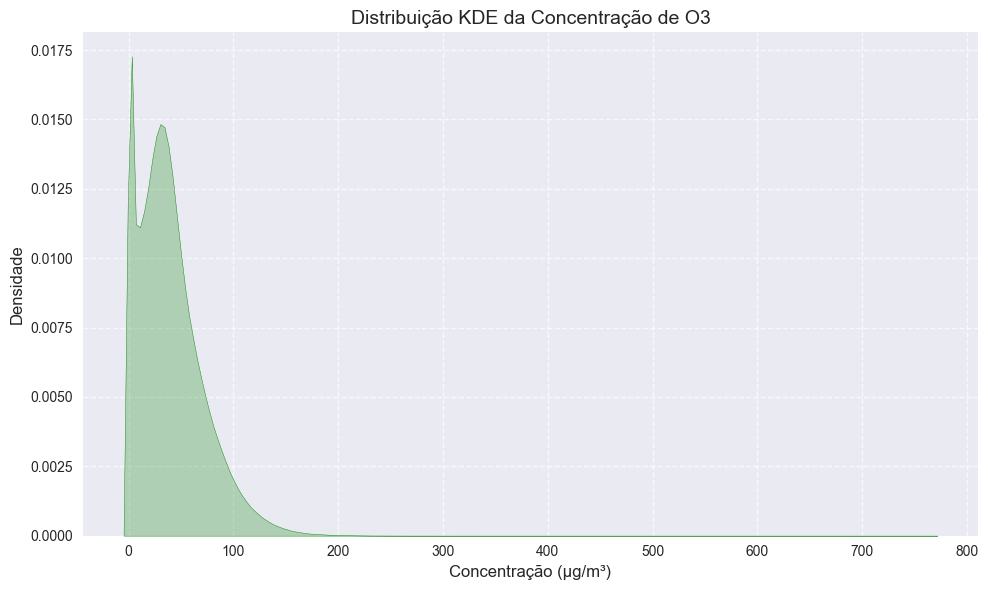

In [35]:
# Filtrando apenas os dados de O3
df_o3 = df[df['Poluente'] == 'O3']

# Plotando a curva de densidade (KDE)
plt.figure(figsize=(10,6))
sns.kdeplot(df_o3['Valor'], color='green', fill=True)
plt.title('Distribuição KDE da Concentração de O3', fontsize=14)
plt.xlabel('Concentração (µg/m³)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()